In [ ]:
# This code is based off the following kernels/articles:
# [1] Leifuer (2019) Flowers with Transfer Learning (MobileNet-Keras). https://www.kaggle.com/leifuer/flowers-with-transfer-learning-mobilenet-keras
# [2] Culfaz, F. (2018) Transfer Learning using Mobilenet and Keras. https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299

In [ ]:
!pip install tfds-nightly
!pip install tensorflow_datasets --upgrade

     |████████████████████████████████| 3.9MB 19.8MB/s 
     |████████████████████████████████| 3.7MB 19.1MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
#For weeds
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras import layers
import tensorflow as tf
dataset_name = "deep_weeds"
(training_set, validation_set), dataset_info = tfds.load(
    dataset_name, split=['train[:80%]', 'train[80%:]'], with_info=True, as_supervised=True
)
num_classes = dataset_info.features['label'].num_classes

Dataset deep_weeds downloaded and prepared to /root/tensorflow_datasets/deep_weeds/3.0.0. Subsequent calls will reuse this data.


In [ ]:
num_classes = dataset_info.features['label'].num_classes
num_training_examples = 0
num_validation_examples = 0

for _ in training_set:
    num_training_examples +=1

for _ in validation_set:
    num_validation_examples +=1

In [ ]:
IMAGE_RES = 224
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label

BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMAGE_RES, IMAGE_RES, 3),include_top=False, weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
base_model.trainable= False
x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(num_classes,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
#model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

EPOCHS = 10

history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/10
438/438 [==============================] - 58s 55ms/step - loss: 1.1049 - accuracy: 0.6291 - val_loss: 0.7625 - val_accuracy: 0.7310
Epoch 2/10
438/438 [==============================] - 24s 51ms/step - loss: 0.6723 - accuracy: 0.7617 - val_loss: 0.7150 - val_accuracy: 0.7501
Epoch 3/10
438/438 [==============================] - 24s 51ms/step - loss: 0.5791 - accuracy: 0.7990 - val_loss: 0.6376 - val_accuracy: 0.7890
Epoch 4/10
438/438 [==============================] - 24s 51ms/step - loss: 0.5260 - accuracy: 0.8211 - val_loss: 0.6348 - val_accuracy: 0.7844
Epoch 5/10
438/438 [==============================] - 24s 51ms/step - loss: 0.4990 - accuracy: 0.8266 - val_loss: 0.5966 - val_accuracy: 0.8018
Epoch 6/10
438/438 [==============================] - 24s 52ms/step - loss: 0.4538 - accuracy: 0.8448 - val_loss: 0.5915 - val_accuracy: 0.7987
Epoch 7/10
438/438 [==============================] - 24s 51ms/step - loss: 0.4447 - accuracy: 0.8470 - val_loss: 0.5948 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


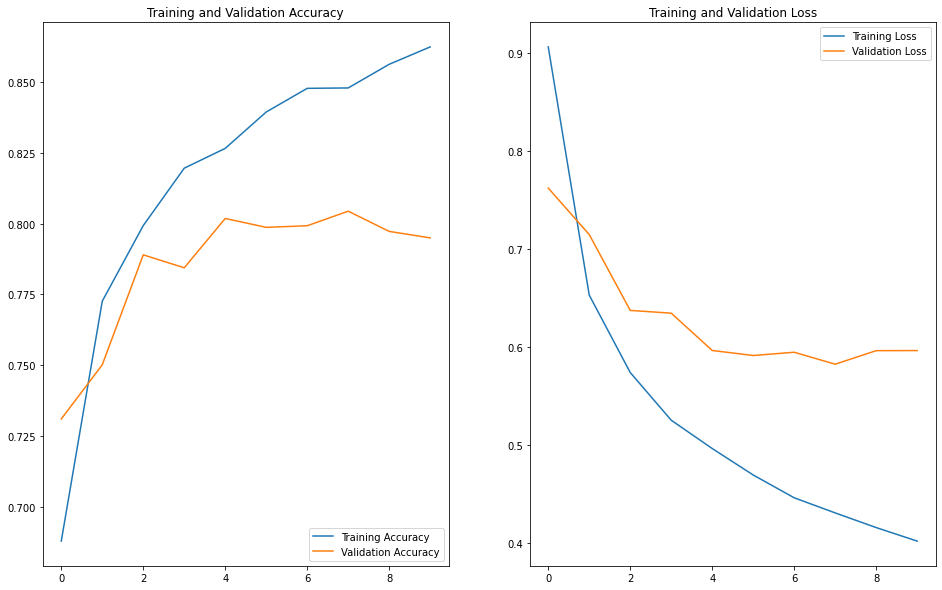

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

model.trainable = True
tune_before = 120
for layer in model.layers[:tune_before]:
  layer.trainable =  False

In [ ]:
EPOCHS = 5

history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/5
438/438 [==============================] - 24s 51ms/step - loss: 0.3926 - accuracy: 0.8657 - val_loss: 0.6191 - val_accuracy: 0.7901
Epoch 2/5
438/438 [==============================] - 24s 51ms/step - loss: 0.3808 - accuracy: 0.8663 - val_loss: 0.5996 - val_accuracy: 0.7944
Epoch 3/5
438/438 [==============================] - 24s 51ms/step - loss: 0.3711 - accuracy: 0.8737 - val_loss: 0.5770 - val_accuracy: 0.8104
Epoch 4/5
438/438 [==============================] - 24s 51ms/step - loss: 0.3612 - accuracy: 0.8771 - val_loss: 0.6161 - val_accuracy: 0.7915
Epoch 5/5
438/438 [==============================] - 24s 51ms/step - loss: 0.3550 - accuracy: 0.8774 - val_loss: 0.6024 - val_accuracy: 0.7953


In [ ]:
EPOCHS = 5

history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/5
438/438 [==============================] - 45s 100ms/step - loss: 0.3458 - accuracy: 0.8811 - val_loss: 0.5918 - val_accuracy: 0.8075
Epoch 2/5
438/438 [==============================] - 45s 99ms/step - loss: 0.3371 - accuracy: 0.8857 - val_loss: 0.5860 - val_accuracy: 0.8061
Epoch 3/5
438/438 [==============================] - 45s 100ms/step - loss: 0.3323 - accuracy: 0.8877 - val_loss: 0.6540 - val_accuracy: 0.7830
Epoch 4/5
438/438 [==============================] - 45s 100ms/step - loss: 0.3256 - accuracy: 0.8888 - val_loss: 0.5967 - val_accuracy: 0.8070
Epoch 5/5
438/438 [==============================] - 45s 100ms/step - loss: 0.3220 - accuracy: 0.8911 - val_loss: 0.5937 - val_accuracy: 0.8041


In [ ]:
EPOCHS = 5

history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/5
438/438 [==============================] - 45s 99ms/step - loss: 0.3161 - accuracy: 0.8931 - val_loss: 0.6407 - val_accuracy: 0.7967
Epoch 2/5
438/438 [==============================] - 45s 100ms/step - loss: 0.3120 - accuracy: 0.8940 - val_loss: 0.6281 - val_accuracy: 0.7990
Epoch 3/5
438/438 [==============================] - 45s 100ms/step - loss: 0.3044 - accuracy: 0.8971 - val_loss: 0.6140 - val_accuracy: 0.8021
Epoch 4/5
438/438 [==============================] - 45s 100ms/step - loss: 0.2993 - accuracy: 0.8961 - val_loss: 0.6442 - val_accuracy: 0.7927
Epoch 5/5
438/438 [==============================] - 45s 99ms/step - loss: 0.2977 - accuracy: 0.8986 - val_loss: 0.6123 - val_accuracy: 0.8073
